In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('data.csv', low_memory=False)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df.shape

(569, 32)

# Preprocessing

We extract the targets from the dataframe

In [3]:
targets = df['diagnosis'].copy()
targets = targets.replace(['M','B'],[0,1])
targets.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

Dropping the unecessary columns from the data:

In [4]:
data = df.drop(['id', 'diagnosis'], axis=1)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Visualization using PCA

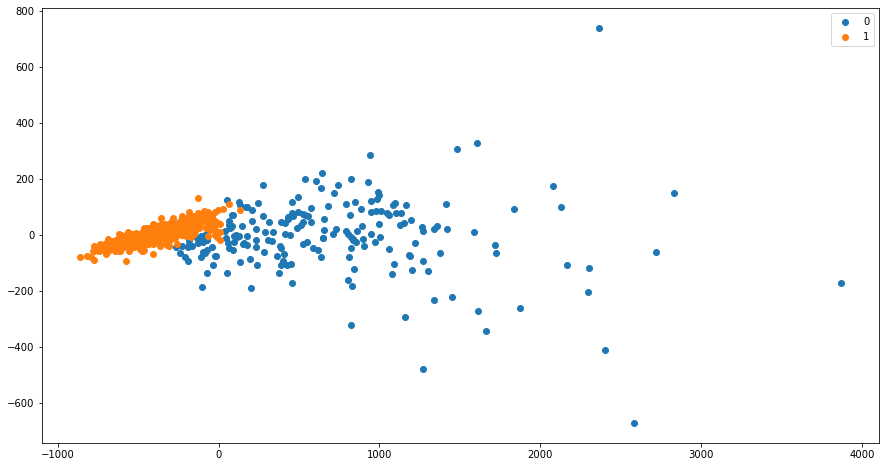

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(2)
datatr = pca.fit_transform(data)
knn5viz = KNeighborsClassifier(n_neighbors=5)
knn5viz.fit(datatr, targets)
model2 = knn5viz.predict(datatr)
unique_labels = np.unique(model2)

fig = plt.figure(1, figsize=(15,8))
for i in unique_labels:
    plt.scatter(datatr[model2 == i, 0], datatr[model2 == i, 1], label = i)
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

# KNN without StandardScaler

We try KNN with multiple values of K, without StandardScaler:

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn5 = KNeighborsClassifier(n_neighbors=11)
knn5.fit(X_train, y_train)
y_pred5 = knn5.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))
print("F1 Score:",metrics.f1_score(y_test, y_pred5))
print("Precision:",metrics.precision_score(y_test, y_pred5))
print("Recall:",metrics.recall_score(y_test, y_pred5))
print('\nClassification report: ', metrics.classification_report(y_test, y_pred5), sep='\n')

Accuracy: 0.965034965034965
F1 Score: 0.9717514124293786
Precision: 0.9772727272727273
Recall: 0.9662921348314607

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.98      0.97      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



We start losing accuracy when K = 13 or higher:

In [9]:
knn7 = KNeighborsClassifier(n_neighbors=13)
knn7.fit(X_train, y_train)
y_pred7 = knn7.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred7))
print("F1 Score: ",metrics.f1_score(y_test, y_pred7))
print("Precision: ",metrics.precision_score(y_test, y_pred7))
print("Recall: ",metrics.recall_score(y_test, y_pred7))

print('\nClassification report: ', metrics.classification_report(y_test, y_pred7), sep='\n')



Accuracy:  0.958041958041958
F1 Score:  0.9666666666666667
Precision:  0.9560439560439561
Recall:  0.9775280898876404

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



### Confusion Matrix for best selected K

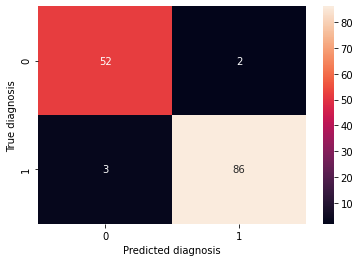

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(metrics.confusion_matrix(y_test, y_pred5), annot=True)
plt.ylabel('True diagnosis')
plt.xlabel('Predicted diagnosis')
plt.show()

# With StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

scaler = StandardScaler()
scaler.fit(X_train)

X_trainsf = scaler.transform(X_train)
X_testsf = scaler.transform(X_test)

knn5sf = KNeighborsClassifier(n_neighbors=11)
knn5sf.fit(X_trainsf, y_train)
y_pred5sf = knn5sf.predict(X_testsf)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred5sf))
print("F1 Score:",metrics.f1_score(y_test, y_pred5sf))
print("Precision:",metrics.precision_score(y_test, y_pred5sf))
print("Recall:",metrics.recall_score(y_test, y_pred5sf))

Accuracy: 0.958041958041958
F1 Score: 0.967032967032967
Precision: 0.946236559139785
Recall: 0.9887640449438202


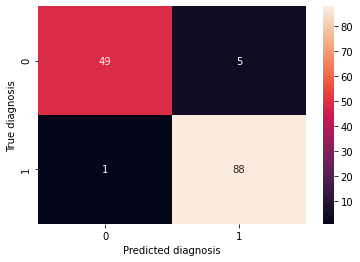

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(metrics.confusion_matrix(y_test, y_pred5sf), annot=True)
plt.ylabel('True diagnosis')
plt.xlabel('Predicted diagnosis')
plt.show()

We can observe that slightly better results are obtained when using StandardScaler.

# AUC score and ROC curve
We use predict_proba to calculate the ROC and AUC:

In [13]:
y_scores = knn5sf.predict_proba(data)
y_score = y_scores[:, i]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred5sf)
auc_score = metrics.roc_auc_score(y_test, y_pred5sf)

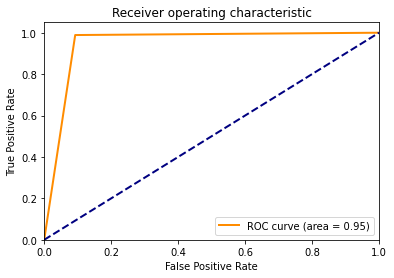

In [14]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# KFold

Using the helper function cross_val_score:

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn5sf, data, targets, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.87719298 0.93859649 0.94736842 0.95614035 0.92920354]
0.93 accuracy with a standard deviation of 0.03


Adding KFold as a parameter:

In [16]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=7)

scores_kf = cross_val_score(knn5sf, data, targets, cv=kf)
print(scores_kf)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_kf.mean(), scores_kf.std()))

[0.84146341 0.90243902 0.9382716  0.98765432 0.95061728 0.95061728
 0.95061728]
0.93 accuracy with a standard deviation of 0.04


Using cross_validate:

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(knn5sf, data, targets, scoring=scoring, cv=kf)
sorted(scores.keys())

print("Recall macro: ", scores['test_recall_macro'])
print("Precision macro: ", scores['test_precision_macro'])
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_kf.mean(), scores_kf.std()))

Recall macro:  [0.88392857 0.88782051 0.93574051 0.98148148 0.93928036 0.94715074
 0.95119048]
Precision macro:  [0.83333333 0.90013228 0.94223602 0.99090909 0.93928036 0.91298812
 0.92616192]
0.93 accuracy with a standard deviation of 0.04


# Conclusion

KNN is an appropriate approach for the cancer dataset used, with a fairly high level of accuracy, however it proves difficult to remove false negatives, which is a concern when dealing with medical data.